In [1]:
from google.colab import files
uploaded = files.upload()

Saving Netravati_data.csv to Netravati_data (1).csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Netravati_data (1).csv']))
print(df)


      Rainfall   Discharge   Temperature      RH        Date  ETO mm  \
0          0.0          0.0         24.88  64.62  01-01-2000    3.66   
1          0.0          3.0         24.73  62.25  02-01-2000    2.23   
2          0.0          1.2         24.79  64.75  03-01-2000    2.36   
3          0.0          1.2         25.40  65.56  04-01-2000    2.75   
4          0.0          1.5         25.87  65.12  05-01-2000    2.47   
...        ...          ...           ...    ...         ...     ...   
6935       0.0          0.0         27.36  69.06  27-12-2018    2.69   
6936       0.0          0.0         27.09  61.62  28-12-2018    2.68   
6937       0.0          0.0         27.06  63.06  29-12-2018    2.54   
6938       0.0          0.0         26.34  63.81  30-12-2018    2.49   
6939       1.0          0.0         25.96  56.44  31-12-2018    2.66   

      Soil Moisture %  
0               34.77  
1               33.67  
2               32.50  
3               31.70  
4              

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-5-daf096e1202c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


Text(0.5, 1.0, 'Correlation Matrix')

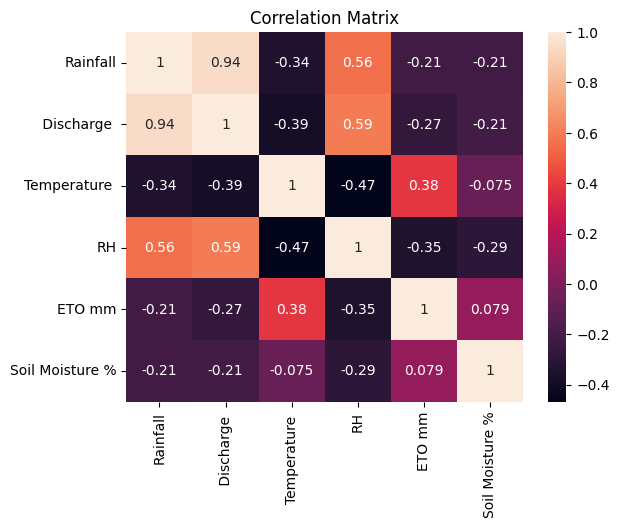

In [5]:
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

In [6]:
df.describe()

,Rainfall,Discharge,Temperature,RH,ETO mm,Soil Moisture %
count,6939.000000,6940.000000,6940.000000,6940.000000,6940.000000,6940.000000
mean,26.794153,311.347713,26.663285,76.562256,2.884076,23.541552
std,51.484901,545.687679,1.565613,11.983556,0.511784,7.859775
min,0.000000,0.000000,22.160000,40.310000,1.950000,0.000000
25%,0.000000,0.000000,25.530000,66.250000,2.490000,16.085000
50%,0.300000,16.290000,26.210000,78.190000,2.760000,23.370000
75%,33.000000,421.980000,27.800000,87.940000,3.230000,31.000000
max,561.000000,5610.000000,31.510000,95.690000,4.920000,36.370000


In [7]:
df.head()

,Rainfall,Discharge,Temperature,RH,Date,ETO mm,Soil Moisture %
0,0.0,0.0,24.88,64.62,01-01-2000,3.66,34.77
1,0.0,3.0,24.73,62.25,02-01-2000,2.23,33.67
2,0.0,1.2,24.79,64.75,03-01-2000,2.36,32.50
3,0.0,1.2,25.40,65.56,04-01-2000,2.75,31.70
4,0.0,1.5,25.87,65.12,05-01-2000,2.47,31.18


In [8]:
df.columns

Index(['Rainfall', ' Discharge ', 'Temperature ', 'RH', 'Date', 'ETO mm',
       'Soil Moisture %'],
      dtype='object')

In [9]:
df.dtypes

Rainfall           float64
 Discharge         float64
Temperature        float64
RH                 float64
Date                object
ETO mm             float64
Soil Moisture %    float64
dtype: object

In [10]:
df.isnull().sum()

Rainfall           1
 Discharge         0
Temperature        0
RH                 0
Date               0
ETO mm             0
Soil Moisture %    0
dtype: int64

In [11]:
df_data=df.dropna()

In [12]:
df_data.isnull().sum()

Rainfall           0
 Discharge         0
Temperature        0
RH                 0
Date               0
ETO mm             0
Soil Moisture %    0
dtype: int64

In [13]:
rainfall = df_data['Rainfall']
Date = df_data['Date']
Discharge = df_data[' Discharge ']
HUmidity = df_data['RH']

In [14]:
rainfall.max()

561.0

In [15]:
import numpy as np

In [16]:
values = np.arange(len(df_data))


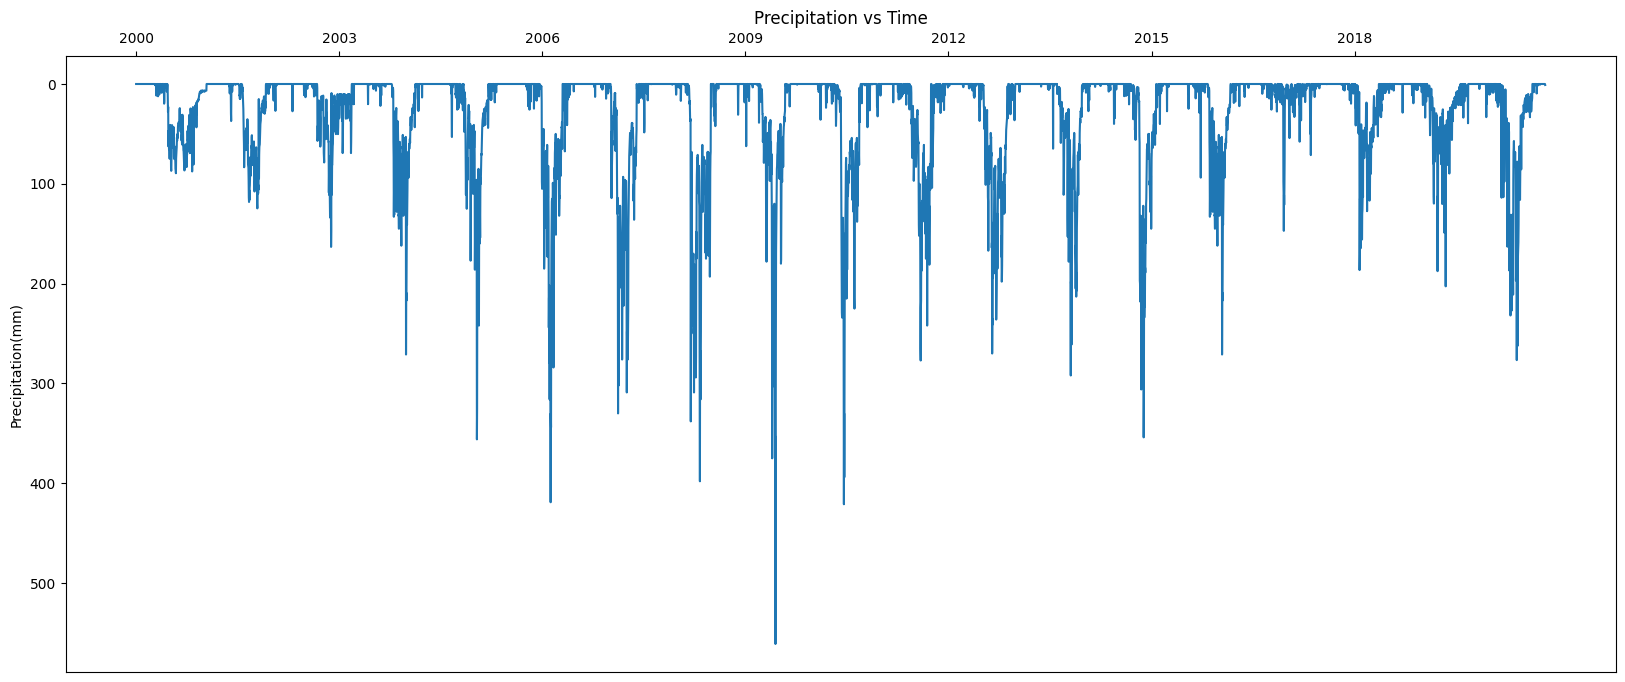

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))

ax = plt.axes()
#plt.plot(Date, rainfall)
plt.plot(values, rainfall)
plt.xticks([0, 1000, 2000, 3000, 4000, 5000,6000],[2000, 2003, 2006, 2009,2012,2015,2018])

#lt.xticks(labels, rotation = 0)
#plt.xlim(labels)
#plt.xlabel("Years")
#plt.invert_yaxis()
ax.invert_yaxis()
plt.title("Precipitation vs Time")
#plt.xlabel("Years")
plt.ylabel("Precipitation(mm)")
ax.xaxis.tick_top()
#plt.ylabel("Precipitation")
plt.show()

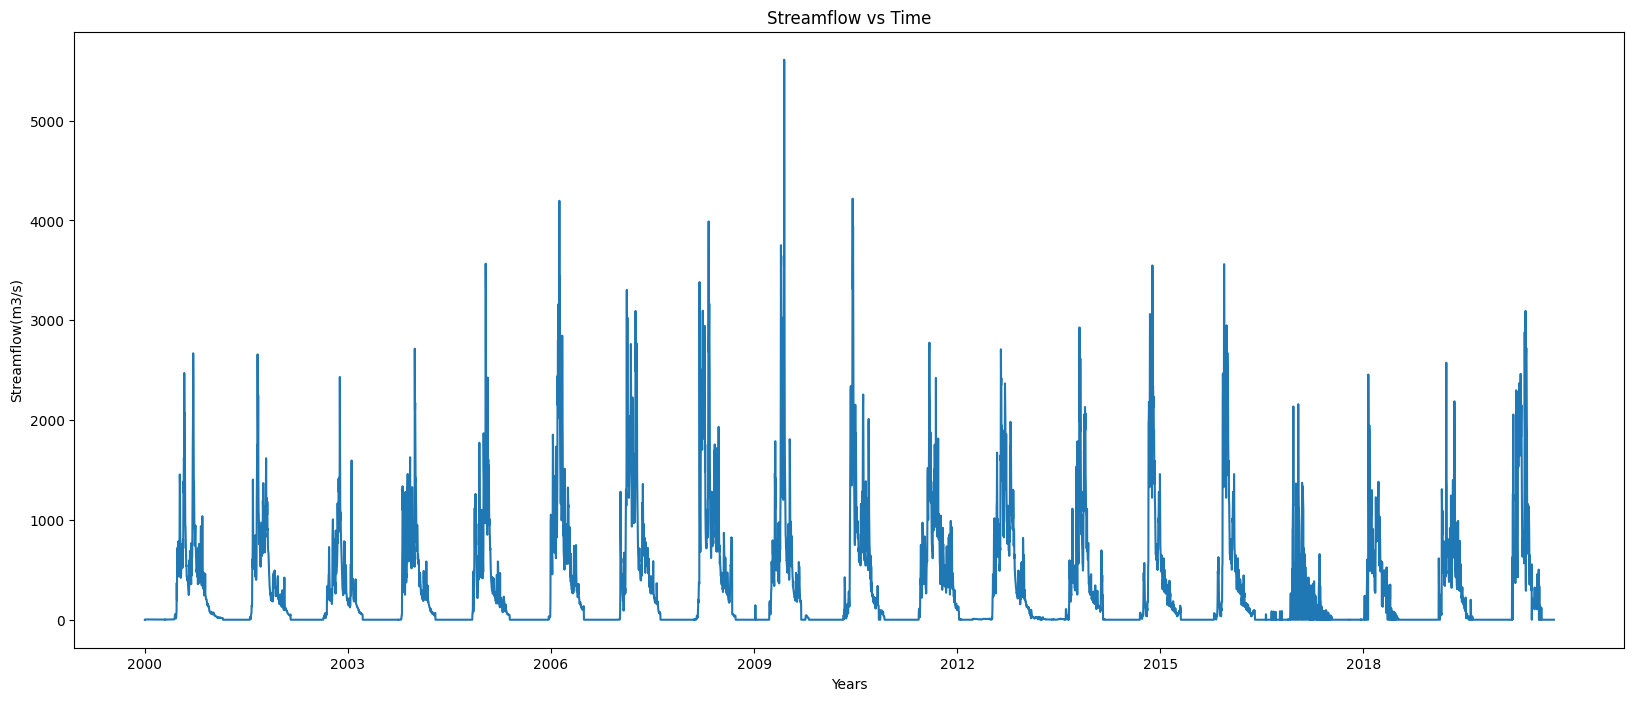

In [18]:
plt.figure(figsize=(20, 8))
plt.plot(values, Discharge)
plt.xticks([0, 1000, 2000, 3000, 4000, 5000,6000],[2000, 2003, 2006, 2009,2012,2015,2018])
plt.title("Streamflow vs Time")
plt.xlabel("Years")
plt.ylabel("Streamflow(m3/s)")
plt.show()


In [19]:
df_data.columns

Index(['Rainfall', ' Discharge ', 'Temperature ', 'RH', 'Date', 'ETO mm',
       'Soil Moisture %'],
      dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_scaled = scaler.fit_transform(df_data[['Rainfall', 'Temperature ', 'RH', 'ETO mm','Soil Moisture %']])

In [22]:
y_scaled = scaler.fit_transform(df_data[[' Discharge ']])

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.3, random_state = 42)

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.fit_transform(X_test)



In [26]:
X_train_scaled

array([[-0.52101099,  1.37171745,  0.11159371,  0.36177927, -1.07746294],
       [-0.52101099,  1.21112755, -0.20749946, -0.24313604, -1.2047733 ],
       [-0.52101099,  0.62015673, -1.59580537,  0.34226587,  0.26820757],
       ...,
       [-0.52101099,  1.59011971, -0.0713419 ,  1.64966348, -1.16403398],
       [-0.51908004, -0.31768828,  1.17078258, -0.92610494,  1.29178286],
       [-0.52101099,  1.4552242 ,  0.08987533, -0.04800207, -0.61532633]])

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import tensorflow_probability as tfp

In [28]:
input_shape = X_train.shape[1]
input_shape

5

In [35]:

keras.utils.set_random_seed(42)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=100,
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[input_shape]),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

def loss_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=50)

model.compile(
    optimizer='adam',
    loss=loss_fn,
)

In [36]:
history = model.fit(
    X_train.astype('float32'), y_train.astype('float32'),
    validation_data=(X_test.astype('float32'), y_test.astype('float32')),
    epochs=100,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/100
152/152 [==============================] - 3s 4ms/step - loss: 0.1987 - val_loss: 0.1463
Epoch 2/100
152/152 [==============================] - 0s 3ms/step - loss: 0.1245 - val_loss: 0.1206
Epoch 3/100
152/152 [==============================] - 0s 3ms/step - loss: 0.1081 - val_loss: 0.1503
Epoch 4/100
152/152 [==============================] - 1s 4ms/step - loss: 0.0891 - val_loss: 0.0672
Epoch 5/100
152/152 [==============================] - 1s 3ms/step - loss: 0.0980 - val_loss: 0.0888
Epoch 6/100
152/152 [==============================] - 0s 3ms/step - loss: 0.0888 - val_loss: 0.1395
Epoch 7/100
152/152 [==============================] - 0s 3ms/step - loss: 0.0957 - val_loss: 0.1299
Epoch 8/100
152/152 [==============================] - 0s 3ms/step - loss: 0.0906 - val_loss: 0.1219
Epoch 9/100
152/152 [==============================] - 1s 3ms/step - loss: 0.0879 - val_loss: 0.0673
Epoch 10/100
152/152 [==============================] - 1s 3ms/step - loss: 0.0828 - val_lo

Minimum validation loss: 0.04767882823944092


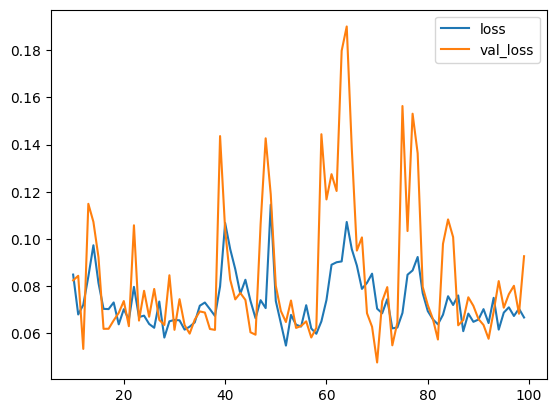

In [37]:
history_df = pd.DataFrame(history.history)[10:]
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [38]:
predictions = model.predict(X_test.astype('float32'))

66/66 [==============================] - 0s 1ms/step


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [40]:
mse_RF = mean_squared_error(y_test, predictions)
mae_RF = mean_absolute_error(y_test, predictions)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

Mean squared error using Random Forest:  0.27345264948015385
Mean absolute error Using Random Forest:  0.28326215411373923
R-squared: 0.7182119770713016
